In [1]:
#Exercise 1
import numpy as np

def p(x,coeff):
    x_arr = x*np.ones_like(coeff)
    x_arr[0] = 1
    return sum(np.cumprod(x_arr)*coeff)

#Test
a = np.array([1,2,3,4])
p(2,a)

49

In [2]:
#Exercise 2
import numpy as np

class discreteRV:
    def __init__(self,q):
        self.q = np.array(q)
    def draw(self,k=1):
        cdf = np.cumsum(self.q)
        points = np.random.uniform(0,1,size=k)
        return cdf.searchsorted(points)

#Test
b = discreteRV(np.array([0.25,0.25,0.5]))
b.draw(5)

array([2, 2, 0, 2, 1], dtype=int64)

In [3]:
#Exercise 3
import numpy as np
import matplotlib.pyplot as plt

class ECDF:
    def __init__(self, observations):
        self.observations = np.array(observations)

    def __call__(self, x):
        sorted_observations = np.array(self.observations.copy())
        sorted_observations.sort() #sort the observations to ensure they are in the ascending order
        counter = sorted_observations.searchsorted(x)
        if x in sorted_observations:  #If x is in the list "sorted_observations", a point equals to x is left out
            counter = counter + 1     #We must take this point into consideration 
        return counter / np.size(self.observations)
    
    def plot(self,a,b,n=100):
        points = np.linspace(a,b,n)
        ecdf_call = np.vectorize(self.__call__)
        ecdf_value = ecdf_call(points)
        plt.plot(points,ecdf_value,'r-',linewidth=2,alpha=0.6)
        plt.show()

0.7
0.48


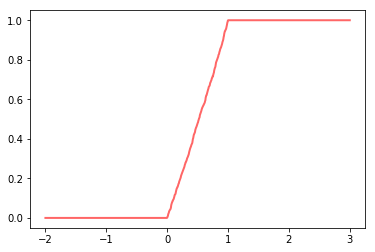

In [4]:
# Exercise 3 Test
from random import uniform
samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

print(F(0.5))  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))
F.plot(-2,3,1000)

In [5]:
#Exercise 4
import numpy as np
def variance(x):
    x_bar = x.mean()
    return np.mean((x-x_bar)**2)

#Test
print(variance(np.array([1,2,3,4,5]))) #using the newly-made function "variance"
print(np.var(np.array([1,2,3,4,5])))   #using function in numpy

2.0
2.0


In [6]:
#Exercise 5
import numpy as np
def gen_matrix(n=2):                       #return a n*n matrix with normalized components
    lst = np.random.normal(0,1,size=(n,n))
    return lst

A = gen_matrix()
B = gen_matrix()
C = gen_matrix()
result_1 = np.dot(np.dot(A,B),C) - np.dot(A,np.dot(B,C))
result_2 = np.dot(A,B).T-np.dot(B.T,A.T)
print(result_1)
print(result_2)

[[  0.00000000e+00   4.44089210e-16]
 [  1.11022302e-16   2.22044605e-16]]
[[ 0.  0.]
 [ 0.  0.]]


In [7]:
#Exercise 5 Test
A = gen_matrix()
B = gen_matrix()
C = gen_matrix()
result_1 = np.dot(np.dot(A,B),C) - np.dot(A,np.dot(B,C))
result_2 = np.dot(A,B).T-np.dot(B.T,A.T)
print(result_1)
print(result_2)

[[ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0.  0.]]


In [8]:
#Exercise 6
import numpy as np
a = np.random.uniform(0,1, (3, 3))
print(a)

#dependent copy
b = a                #b is a reference to a.Once b is changed, a is also changed        

#independent copy
c = np.zeros_like(a)  #b is an independent copy of a, which remains constant when a changes
np.copyto(c,a)      
print(b)
print(c)

[[ 0.26217885  0.65310311  0.88962854]
 [ 0.21980269  0.15458288  0.99691328]
 [ 0.44383978  0.65178551  0.43101697]]
[[ 0.26217885  0.65310311  0.88962854]
 [ 0.21980269  0.15458288  0.99691328]
 [ 0.44383978  0.65178551  0.43101697]]
[[ 0.26217885  0.65310311  0.88962854]
 [ 0.21980269  0.15458288  0.99691328]
 [ 0.44383978  0.65178551  0.43101697]]


In [9]:
#Exercise 7
import numpy as np
x = np.pi/np.arange(1,101)
x.sort()
y1 = np.sin(x)**2
y2 = np.cos(x)**2

In [10]:
#Exercise 8
import numpy as np
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
def f(x):
    return 1 if x % 5 == 0 else 0

f = np.vectorize(f) #vectorize a given function
print(f(A))

#'map' function can also be used to solve this problem
#list((map(f,A)))  

[0 0 0 0 1 0 0 0 0 1]
